## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('flat_research_minsk.csv')
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head(3)


(13915, 26)


,Область,Населенный пункт,Адрес,Район города,Метро,Комнат всего/разд.,Этаж / этажность,Тип дома,Площадь общая/жилая/кухня,Высота потолков,...,Площадь по СНБ,Планировка,Год кап.ремонта,Телефон,Дополнительно,Полы,Вид этажа,"Площадь балконов, лоджий, террас",Unnamed: 24,Число уровней
0,Минская область,г. Минск,Прилукская ул.,"Московский районМикрорайон ""Михалово""","м. Михалово , расстояние ≈900м, (Московская ли...",1 / 1,7 / 14,каркасно-блочный,41.74 / 27.56 / – м²,2.7 м,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Минская область,г. Минск,"Червякова ул., 22 Информация о доме","Центральный районМикрорайон ""Червякова, Шевченко""",NaN,3 / 2,2 / 9,кирпичный,60.1 / 41.6 / 8.2 м²,2.5 м,...,60.1 кв.м.,стандартный проект,2006.0,есть,NaN,NaN,NaN,NaN,NaN,NaN
2,Минская область,г. Минск,"Богдановича ул., 55 Информация о доме","Советский районМикрорайон ""Богдановича, Куйбыш...","м. Площадь Победы , расстояние ≈1450м, (Москов...",4 / 2,7 / 9,панельный,79.1 / 54.06 / 7.2 м²,NaN,...,NaN,стандартный проект,NaN,NaN,"встроенные шкафы, стеклопакеты, бытовая техника",NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Область                           13915 non-null  object 
 1   Населенный пункт                  13915 non-null  object 
 2   Адрес                             13915 non-null  object 
 3   Район города                      13901 non-null  object 
 4   Метро                             8112 non-null   object 
 5   Комнат всего/разд.                13915 non-null  object 
 6   Этаж / этажность                  13909 non-null  object 
 7   Тип дома                          13062 non-null  object 
 8   Площадь общая/жилая/кухня         13915 non-null  object 
 9   Высота потолков                   10161 non-null  object 
 10  Год постройки                     13262 non-null  float64
 11  Сан/узел                          11040 non-null  object 
 12  Балк

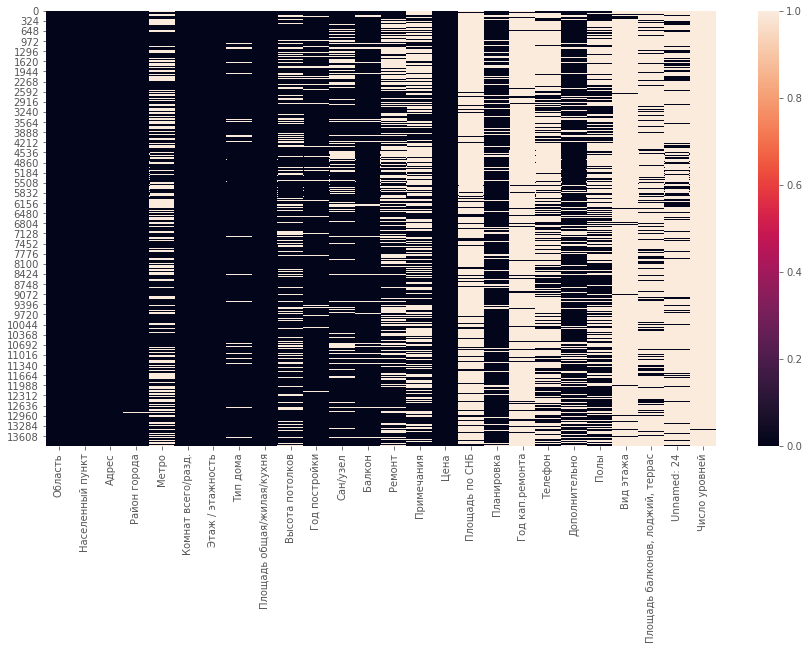

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

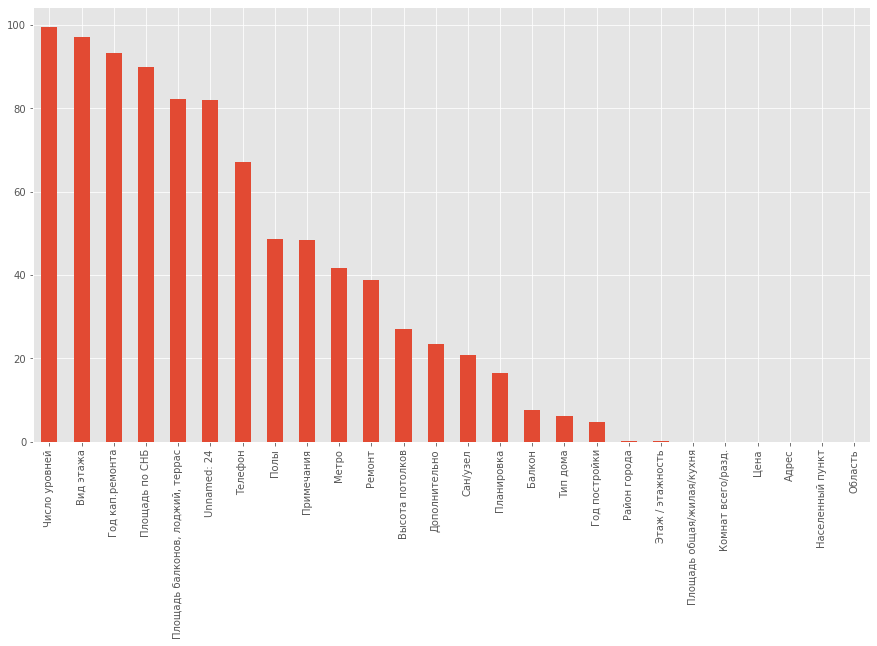

In [6]:
plt.figure(figsize=(15,8))
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False).plot(kind='bar');

In [7]:
df['Населенный пункт'].unique()

array(['г. Минск'], dtype=object)

Выкинем из наших данных неиформативные признаки и признаки с большим количеством пропусков, а также Область и Населеный пункт, так как наши все данные из Минска

In [8]:
df.drop(['Число уровней', 'Unnamed: 24', 'Год кап.ремонта',
         'Площадь по СНБ', 'Площадь балконов, лоджий, террас',
         'Вид этажа', 'Телефон', 'Населенный пункт', 'Область'], axis=1, inplace=True)

In [9]:
df.head(3)

,Адрес,Район города,Метро,Комнат всего/разд.,Этаж / этажность,Тип дома,Площадь общая/жилая/кухня,Высота потолков,Год постройки,Сан/узел,Балкон,Ремонт,Примечания,Цена,Планировка,Дополнительно,Полы
0,Прилукская ул.,"Московский районМикрорайон ""Михалово""","м. Михалово , расстояние ≈900м, (Московская ли...",1 / 1,7 / 14,каркасно-блочный,41.74 / 27.56 / – м²,2.7 м,2022.0,2 сан.узла,лоджия застекленная,без отделки,Новый жилой комплекс комфорт класса «Smart» на...,125 146 BYN,NaN,NaN,NaN
1,"Червякова ул., 22 Информация о доме","Центральный районМикрорайон ""Червякова, Шевченко""",NaN,3 / 2,2 / 9,кирпичный,60.1 / 41.6 / 8.2 м²,2.5 м,1969.0,раздельный,балкон,нормальный ремонт,Поможем продать вашу квартиру для покупки этой.,161 805 BYN,стандартный проект,NaN,NaN
2,"Богдановича ул., 55 Информация о доме","Советский районМикрорайон ""Богдановича, Куйбыш...","м. Площадь Победы , расстояние ≈1450м, (Москов...",4 / 2,7 / 9,панельный,79.1 / 54.06 / 7.2 м²,NaN,1978.0,раздельный,2 лоджии застекленные,отличный ремонт,"Отличный ремонт, качественные материалы, стекл...",265 461 BYN,стандартный проект,"встроенные шкафы, стеклопакеты, бытовая техника",NaN


Создадими стоблцы с раздельными данными

In [10]:
df['Комнат всего/разд.'].unique()

array(['1 / 1', '3 / 2', '4 / 2', '4 / 0', '2 / 2', '2 / 1', '3 / 3',
       '4 / 4',
       'Фактически 2-комнатная квартира. Свободная планировка. По техпаспорту – 1 комнатная квартира.',
       'Свободная планировка (3-комнатная)', '2 / 0',
       'Свободная планировка (2-комнатная)',
       'Свободная планировка (1-комнатная)', '4 / 3', '4 / 1', '5 / 2',
       '1/6 доли в 1-комнатной квартире',
       '26/100 доли в 3-комнатной квартире',
       'комната в 3-комнатной квартире', 'доля в 1-комнатной квартире',
       'комната в 5-комнатной квартире', 'комната в 4-комнатной квартире',
       '1/2 доли в 1-комнатной квартире',
       'комната в 6-комнатной квартире',
       '3/20 доли в 5-комнатной квартире',
       '13/100 доли в 6-комнатной квартире',
       '0.31 доли в 3-комнатной квартире',
       '3/5 доли в 2-комнатной квартире',
       '7/20 доли в 3-комнатной квартире',
       '1/4 доли в 4-комнатной квартире',
       '9/25 доли в 2-комнатной квартире',
       'комната в 2-к

In [11]:
df['Все комнаты'] = df['Комнат всего/разд.'].apply(lambda x : x[0] if re.search('[а-я-А-Я]', x) is None else np.nan)
df['Все комнаты'] = pd.to_numeric(df['Все комнаты'], errors='coerce')
df['Раздельных комнат'] = df['Комнат всего/разд.'].apply(lambda x : x[-1] if re.search('[а-я-А-Я]', x) is None else int(re.search('[0-9]-', x)[0][0]))
df['Раздельных комнат'] = pd.to_numeric(df['Раздельных комнат'], errors='coerce')


In [12]:
df['Этаж / этажность'].fillna(0, inplace=True)
df['Этаж / этажность'] = df['Этаж / этажность'].apply(str)

In [13]:
df['Этаж / этажность'].unique()

array(['7 / 14', '2 / 9', '7 / 9', '3 / 5', '8 / 9', '22 / 25', '1 / 5',
       '3 / 9', '1 / 9', '4 / 26', '2 / 19', '16 / 18', '2 / 20', '2 / 5',
       '3 / 25', '1 / 25', '21 / 24', '5 / 5', '5 / 10', '15 / 19',
       '23 / 24', '4 / 10', '16 / 20', '1 / 10', '12 / 25', '3 / 16',
       '10 / 12', '3 / 6', '1 / 19', '18 / 19', '10 / 15', '7 / 24',
       '3 / 20', '2 / 2', '5 / 19', '4 / 4', '6 / 10', '6 / 12', '4 / 9',
       '21 / 25', '2 / 8', '8 / 12', '8 / 16', '2 / 25', '2 / 14',
       '19 / 25', '1 / 3', '5 / 7', '18 / 26', '2 / 4', '12 / 19',
       '9 / 9', '12 / 20', '13 / 14', '2 / 13', '2 / 10', '16 / 25',
       '16 / 16', '18 / 20', '13 / 13', '9 / 12', '7 / 7', '4 / 5',
       '5 / 9', '21 / 27', '19 / 19', '8 / 10', '6 / 9', '3 / 4',
       '19 / 21', '15 / 24', '24 / 25', '15 / 18', '2 / 12', '11 / 25',
       '9 / 25', '7 / 10', '14 / 17', '8 / 25', '20 / 25', '4 / 12',
       '1 / 12', '1 / 4', '2 / 3', '3 / 3', '7 / 12', '1 / 1', '3 / 12',
       '11 / 12', '1

In [14]:
df['Этаж'] = df['Этаж / этажность'].apply(lambda x : int(re.search('\d\d-|\d-', x)[0][:-1])
                                          if re.search('-[а-яА-Я]', x) is not None and x!=0
                                          else( int(re.search('\d\d|\d', x)[0][0]
                                                   if x != 0 and re.search('[а-яА-Я]', x) is not None
                                                   else(int(x[0:2]) if x!=0 else np.nan))))
df['Этаж'] = pd.to_numeric(df['Этаж'], errors='coerce')

df['Этажность'] = df['Этаж / этажность'].apply(lambda x : int(re.search('\d\d-|\d-', x)[0][:-1])
                                          if re.search('-[а-яА-Я]', x) is not None and x!=0
                                          else( int(re.search('\d\d|\d', x)[0][0]
                                                   if x != 0 and re.search('[а-яА-Я]', x) is not None
                                                   else(int(x[-2:]) if x!=0 else np.nan))))
df['Этажность'] = pd.to_numeric(df['Этажность'], errors='coerce')

In [15]:
df['Площадь общая/жилая/кухня'] = df['Площадь общая/жилая/кухня'].apply(str)
df['Площадь общая/жилая/кухня'].unique()

array(['41.74 / 27.56 / – м²', '60.1 / 41.6 / 8.2 м²',
       '79.1 / 54.06 / 7.2 м²', ..., '440 / 200 / 13.4 м²',
       '234.8 / 186.9 / 30 м²', '316.4 / 153.8 / 27.4 м²'], dtype=object)

In [16]:
df['Площадь общая'] = df['Площадь общая/жилая/кухня'].apply(lambda x: x.split('/')[0])
df['Площадь общая'] = pd.to_numeric(df['Площадь общая'], errors='coerce')

df['Площадь жилая'] = df['Площадь общая/жилая/кухня'].apply(lambda x: x.split('/')[1])
df['Площадь жилая'] = pd.to_numeric(df['Площадь жилая'], errors='coerce')

df['Площадь кухни'] = df['Площадь общая/жилая/кухня'].apply(lambda x: x.split('/')[2][:-2])
df['Площадь кухни'] = pd.to_numeric(df['Площадь кухни'], errors='coerce')

In [17]:
df.drop(['Комнат всего/разд.', 'Этаж / этажность', 'Площадь общая/жилая/кухня'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Адрес              13915 non-null  object 
 1   Район города       13901 non-null  object 
 2   Метро              8112 non-null   object 
 3   Тип дома           13062 non-null  object 
 4   Высота потолков    10161 non-null  object 
 5   Год постройки      13262 non-null  float64
 6   Сан/узел           11040 non-null  object 
 7   Балкон             12847 non-null  object 
 8   Ремонт             8512 non-null   object 
 9   Примечания         7171 non-null   object 
 10  Цена               13915 non-null  object 
 11  Планировка         11642 non-null  object 
 12  Дополнительно      10646 non-null  object 
 13  Полы               7145 non-null   object 
 14  Все комнаты        8285 non-null   float64
 15  Раздельных комнат  13912 non-null  float64
 16  Этаж               139

In [19]:
df['Метро'].fillna(-1, inplace=True)
df['Метро'].isnull().sum()
df['Метро'] = df['Метро'].apply(str)

Сделаем столбец с расстоянием до метро. Если в данных не было указано расстояние то возьмем среднее, а если в данных была пропущен столбец метро то поставим -1

In [20]:
df['Расстояние до метро'] = df['Метро'].apply(lambda x: re.search('\≈\w+', x)[0][1:-1] if x !=-1 and 
                                              re.search('\≈\w+', x) is not None
                                              else (-1 if x == '-1' else 0))
df['Расстояние до метро'] = pd.to_numeric(df['Расстояние до метро'], errors='coerce')

In [21]:
df['Расстояние до метро'] = df['Расстояние до метро'].apply(lambda x: df['Расстояние до метро'].mean() if x == 0 else x)

In [22]:
df.drop('Метро',axis=1,inplace=True)

Выделим районы города

In [23]:
df['Район города'].isnull().sum()

14

Eсли по нему не было данных просто удалим это наблюдение, так как их очень мало

In [24]:
df['Район города'].unique()

array(['Московский районМикрорайон "Михалово"',
       'Центральный районМикрорайон "Червякова, Шевченко"',
       'Советский районМикрорайон "Богдановича, Куйбышева, Веры Хоружей, Независимости"',
       'Центральный районМикрорайон "Дрозды"',
       'Фрунзенский районМикрорайон "Сухарево"',
       'Первомайский районМикрорайон "Макаенка"',
       'Заводской районМикрорайон "Шабаны"',
       'Первомайский районМикрорайон "Независимости, Кедышко, Волгоградская"',
       'Центральный районМикрорайон "Лебяжий (Ржавец)"',
       'Ленинский районМикрорайон "нач.Партизанского, пл.Ванеева"',
       'Октябрьский районМикрорайон "Минск Мир (Minsk World)"',
       'Первомайский районМикрорайон "Маяк Минска"',
       'Первомайский районМикрорайон "Восток"',
       'Советский районМикрорайон "Гикало, Золотая Горка"',
       'Советский районМикрорайон "Я.Коласа-Рига, Некрасова, Восточная"',
       'Октябрьский районМикрорайон "Воронянского, Могилевская, Чкалова"',
       'Фрунзенский районМикрорай

In [25]:
df['Район города'].dropna(inplace=True)
df['Район города'] = df['Район города'].apply(str)

In [26]:
df['Район города'] = df['Район города'].apply(lambda x: re.search('\w+ район', x)[0] 
                                              if re.search('\w+ район', x) is not None
                                             else x[0])

In [27]:
df.head(3)

,Адрес,Район города,Тип дома,Высота потолков,Год постройки,Сан/узел,Балкон,Ремонт,Примечания,Цена,...,Дополнительно,Полы,Все комнаты,Раздельных комнат,Этаж,Этажность,Площадь общая,Площадь жилая,Площадь кухни,Расстояние до метро
0,Прилукская ул.,Московский район,каркасно-блочный,2.7 м,2022.0,2 сан.узла,лоджия застекленная,без отделки,Новый жилой комплекс комфорт класса «Smart» на...,125 146 BYN,...,NaN,NaN,1.0,1.0,7,14,41.74,27.56,NaN,900.0
1,"Червякова ул., 22 Информация о доме",Центральный район,кирпичный,2.5 м,1969.0,раздельный,балкон,нормальный ремонт,Поможем продать вашу квартиру для покупки этой.,161 805 BYN,...,NaN,NaN,3.0,2.0,2,9,60.10,41.60,8.2,-1.0
2,"Богдановича ул., 55 Информация о доме",Советский район,панельный,NaN,1978.0,раздельный,2 лоджии застекленные,отличный ремонт,"Отличный ремонт, качественные материалы, стекл...",265 461 BYN,...,"встроенные шкафы, стеклопакеты, бытовая техника",NaN,4.0,2.0,7,9,79.10,54.06,7.2,1450.0


Посмотрим на стольец Типы домов

In [29]:
df['Тип дома'].unique()

array(['каркасно-блочный', 'кирпичный', 'панельный', 'силикатные блоки',
       'монолитный', 'блок-комнаты', 'бревенчатый', nan, 'мк', 'кар'],
      dtype=object)

In [30]:
df[df['Тип дома']=='кар']

,Адрес,Район города,Тип дома,Высота потолков,Год постройки,Сан/узел,Балкон,Ремонт,Примечания,Цена,...,Дополнительно,Полы,Все комнаты,Раздельных комнат,Этаж,Этажность,Площадь общая,Площадь жилая,Площадь кухни,Расстояние до метро
13525,"Филимонова ул., 14 Информация о доме",Партизанский район,кар,2.7 м,2004.0,2 сан.узла,лоджия застекленная,отличный ремонт,Улучшенная просторная квартира в монолитном до...,446 429 BYN,...,"мебель, встроенные шкафы, джакузи, металлическ...",ламинированные,4.0,4.0,12,19,115.0,71.0,14.0,-1.0


Удалим непонятный нам тип потому что он единственный 

In [31]:
df.drop(df[df['Тип дома']=='кар'].index, inplace=True)

Переведем числовые значения в правильный тип

In [32]:
df['Высота потолков'].fillna(-1, inplace=True)
df['Высота потолков'] = df['Высота потолков'].apply(str)
df['Высота потолков'] = df['Высота потолков'].apply(lambda x: x[:-2] if x != '-1' else -1)

In [33]:
df['Цена'] = df['Цена'].apply(lambda x: x[:-4])
df['Цена'] = df['Цена'].apply(lambda x: x.replace(" ", ""))
df['Цена'] = pd.to_numeric(df['Цена'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13914 entries, 0 to 13914
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Адрес                13914 non-null  object 
 1   Район города         13914 non-null  object 
 2   Тип дома             13061 non-null  object 
 3   Высота потолков      13914 non-null  object 
 4   Год постройки        13261 non-null  float64
 5   Сан/узел             11039 non-null  object 
 6   Балкон               12846 non-null  object 
 7   Ремонт               8511 non-null   object 
 8   Примечания           7170 non-null   object 
 9   Цена                 13914 non-null  int64  
 10  Планировка           11641 non-null  object 
 11  Дополнительно        10645 non-null  object 
 12  Полы                 7144 non-null   object 
 13  Все комнаты          8284 non-null   float64
 14  Раздельных комнат    13911 non-null  float64
 15  Этаж                 13914 non-null 

In [35]:
df.to_csv('processed_data.csv', index=False)